In [1]:
from scipy.integrate import odeint as ode
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# dados dimensionais:

M = 20
m = 2 
R = 0.4
L = 0.4
g = 10
P = 2*(M+m)*g

# inclui o array parameters:

parameters = [M, m, R, L, g]

# dados do motor e dos mancais:

T0 = 10
k = 0.1
q = 1

# momentos de inércia e produtos de inércia

Jz = M*(R**2) + ((4*m*(L**2))/3)
Jyz = m*(L**2)

# condições iniciais

theta0 = 0
omega0 = 0.0
alfa0 = T0/Jz

y = [theta0, omega0]

# distância (G-A):

xg = 0
yg = (3*m*L)/(4*(M+m))
zg = (6*M*L + 3*m*L)/(4*(M+m))



In [3]:
# function torque de acionamento

def functionT(w):
  if w > (T0/k):
    return 0

  T = T0 - k*w
  return T

In [4]:
# function torque resistivo

def functionQ(w):
    
  Q = -q*w

  return Q

In [5]:
ay = []
parameters = [M, m, R, L, g]

# Etapa 1

### e) Grafico w(t) e as reações em Y e Z no ponto A.

As equações abaixo:

Para a reação em A:

$$
    Y_{A} = 2(M+m)[g(1 - \frac{Z_{G}}{3L}) - Y_{G}((\dot{\theta})^2 cos\theta + \ddot{\theta}sin\theta)] + \frac{Y_{G}}{3L}(\ddot{\theta}sin{\theta} + \dot{\theta}^2cos{\theta})
$$

e:


$$
    Z_{A} = 0
$$

Para a EDO:

$$
     \ddot{\theta} = \frac{T(\dot{\theta}) + Q(\dot{\theta}) + PY_{G}sin(\theta)}{J_{Z}}
$$

com:

$$
    T(\dot{\theta}) = T_{0} - wk
$$

e:
$$
    Q(\dot{\theta}) = -qw
$$

In [6]:
def function_omega(y, interval, parameters):

  ydot = [0, 0]

  ydot[0] = y[1]
  ydot[1] = (P*yg*np.sin(y[0]) + functionT(y[1]) + functionQ(y[1]))/(Jz)

  return ydot

In [7]:
# intervalo

ti = 0.
tf = 30
h = 0.01

interval = np.arange(ti, tf, h)

In [8]:
Y = ode(function_omega, y, interval, args=(parameters,))

In [9]:
Xn = Y[:, 0]
Vn = Y[:, 1]

In [10]:
def function_react(balanced, vertical):
    
    ay = []
    array = np.array([Xn, Vn])    

    for i in range(0, 3000):

        acc = (P*yg*np.sin(array[0,i]) + functionT(array[1,i]) + functionQ(array[1,i]))/(Jz)
        
        if vertical == False:
            if balanced == False:
                value = ((P/g)*(g*(1-(zg/(3*L))) - yg*((array[1,i]**2)*np.cos(array[0,i]) + acc*np.sin(array[0,i])))) + (1/(3*L))*m*(L**2)*(acc*np.sin(array[0,i]) + (array[1,i]**2)*np.cos(array[0,i]))
            else:
                value = ((P/g)*(g*(1-(zg/(3*L))) - yg*((array[1,i]**2)*np.cos(array[0,i]) + acc*np.sin(array[0,i])))) + (1/(3*L))*m*(L**2)*(acc*np.sin(array[0,i]))
        elif vertical == True:
            value = ((P/g)*yg*((g/(3*L)) - (array[1,i]**2)*np.cos(array[0,i]) - acc*np.sin(array[0,i]))) + (1/(3*L))*m*(L**2)*(acc*np.sin(array[0,i]) + (array[1,i]**2)*np.cos(array[0,i]))
        ay.append(value)
    
    return ay

In [11]:
ay = function_react(balanced = False, vertical = False)

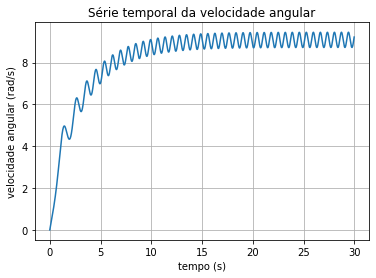

In [12]:
plt.plot(interval,Vn)
plt.title("Série temporal da velocidade angular")
plt.xlabel("tempo (s)")
plt.ylabel("velocidade angular (rad/s)")
plt.grid()
plt.show()

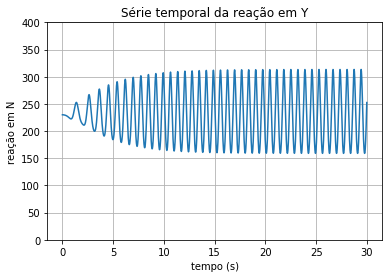

In [13]:
plt.plot(interval, ay)
plt.title("Série temporal da reação em Y")
plt.xlabel("tempo (s)")
plt.ylabel("reação em N")
axes = plt.gca()
axes.set_ylim([0,400])
plt.grid()

# A Reação em Za = 0

# Etapa 2

### h) Com o rotor desbalanceado, repita o item e) para T0 = 2,5

In [14]:
T0 = 2.5

Y = ode(function_omega, y, interval, args=(parameters,))

In [15]:
Xn = Y[:, 0]
Vn = Y[:, 1]

In [16]:
ay = function_react(balanced = False, vertical = False)

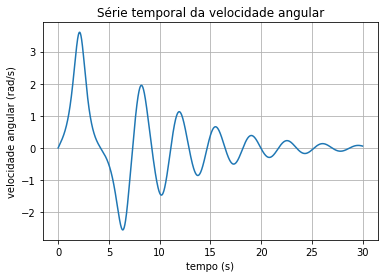

In [17]:
plt.plot(interval,Vn)
plt.title("Série temporal da velocidade angular")
plt.xlabel("tempo (s)")
plt.ylabel("velocidade angular (rad/s)")
plt.grid()
plt.show()

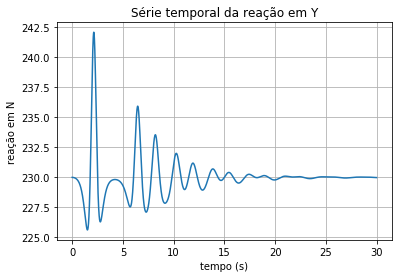

In [18]:
plt.plot(interval, ay)
plt.title("Série temporal da reação em Y")
plt.xlabel("tempo (s)")
plt.ylabel("reação em N")
plt.grid()

# A reação em Za = 0

# Etapa 3

##### Para o rotor na posição vertical desbalanceado:

A EDO:

$$
    \ddot{\theta} = \frac{T(\dot{\theta}) + Q(\dot{\theta})}{Jz}
$$

As reações em A:

$$
    Y_{A} = 2(M+m)Y_{G}[(\frac{g}{3L} - \dot{\theta}^2)cos{\theta} - \ddot{\theta}sin{\theta}] + \frac{Y_{G}}{3L}(\ddot{\theta}sin{\theta} + \dot{\theta}^2cos{\theta})
$$

e:
$$
    Z_{A} = P
$$

In [19]:
T0 = 10
az = []

In [20]:
def function_omega_vertical(y, interval, parameters):

    ydot = [0, 0]

    ydot[0] = y[1]
    ydot[1] = (functionT(y[1]) + functionQ(y[1]))/(Jz)

    return ydot

In [21]:
Y = ode(function_omega_vertical, y, interval, args=(parameters,))

In [22]:
Xn = Y[:, 0]
Vn = Y[:, 1]

In [23]:
ay = function_react(balanced = False,vertical = True)

In [24]:
az = []
valueZ = P
for i in range(0, len(interval)):
    az.append(valueZ)

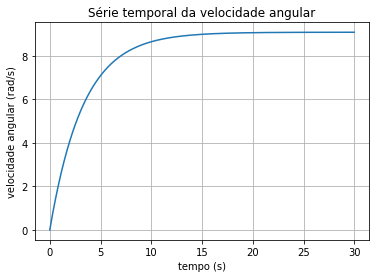

In [25]:
plt.plot(interval,Vn)
plt.title("Série temporal da velocidade angular")
plt.xlabel("tempo (s)")
plt.ylabel("velocidade angular (rad/s)")
plt.grid()
plt.show()

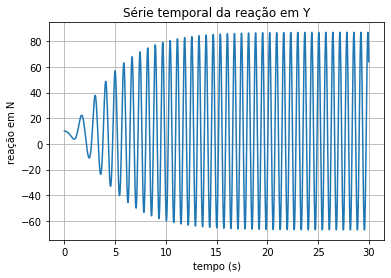

In [26]:
plt.plot(interval, ay)
plt.title("Série temporal da reação em Y")
plt.xlabel("tempo (s)")
plt.ylabel("reação em N")
plt.grid()

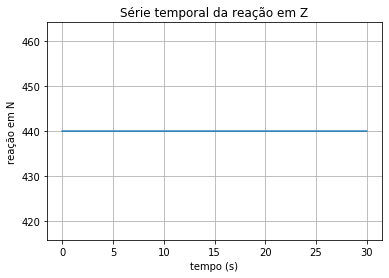

In [27]:
plt.plot(interval, az)
plt.title("Série temporal da reação em Z")
plt.xlabel("tempo (s)")
plt.ylabel("reação em N")
plt.grid()

# Etapa 2

### f) e g) Repita o item e) com o rotor balanceado:

#### Para o rotor balanceado:

$$
        Y_{A} = 2(M+m)[g(1 - \frac{Z_{G}}{3L})]
$$

além disso:

$$
    m_{1} = \frac{7mL}{6R}
$$
e:
$$
    m_{2} = \frac{mL}{3R}
$$
Como teve novas massas, então:

$$
    J_{Z} = (M+m_{1}+m_{2})R^2 + \frac{4mL^2}{3}
$$

In [28]:
# para o rotor balanceado:

m1 = (7*m*L)/(6*R)
m2 = (m*L)/(3*R)

P = P + (11*m*L)/(6*R) + (m*L)/(3*R)
yg = 0
Jz = (M + m1 + m2)*(R**2) + ((4*m*(L**2))/3)

In [29]:
Y = ode(function_omega, y, interval, args=(parameters,))

In [30]:
Xn = Y[:, 0]
Vn = Y[:, 1]

In [31]:
ay = function_react(balanced = True, vertical = False)

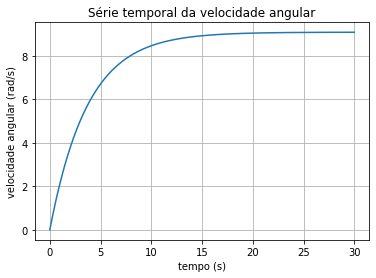

In [32]:
plt.plot(interval,Vn)
plt.title("Série temporal da velocidade angular")
plt.xlabel("tempo (s)")
plt.ylabel("velocidade angular (rad/s)")
plt.grid()
plt.show()

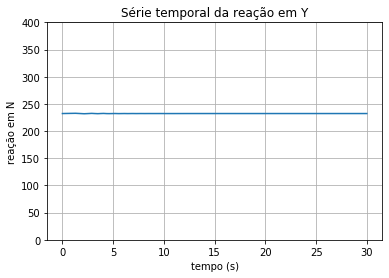

In [33]:
plt.plot(interval, ay)
plt.title("Série temporal da reação em Y")
plt.xlabel("tempo (s)")
plt.ylabel("reação em N")
axes = plt.gca()
axes.set_ylim([0,400])
plt.grid()

# A reacão em Za = 0